# Making visualisations

## Setup

### Importing libraries

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Importing files

In [2]:
path = os.path.join("output", "processed_data")

In [3]:
# infiles
a330Y_in = os.path.join(path, "A330_year.csv")
a330YC_in = os.path.join(path, "A330_year-count.csv")
a340Y_in = os.path.join(path, "A340_year.csv")
a340YC_in = os.path.join(path, "A340_year-count.csv")
a350Y_in = os.path.join(path, "A350_year.csv")
a350YC_in = os.path.join(path, "A350_year-count.csv")
a380Y_in = os.path.join(path, "A380_year.csv")
a380YC_in = os.path.join(path, "A380_year-count.csv")
allY_in = os.path.join(path, "allAircraft_datetime_year.csv")
allYC_in = os.path.join(path, "allAircraft_year-count.csv")

In [4]:
# dataframes
a330_y = pd.read_csv(a330Y_in)
a330_yc = pd.read_csv(a330YC_in)
a340_y = pd.read_csv(a340Y_in)
a340_yc = pd.read_csv(a340YC_in)
a350_y = pd.read_csv(a350Y_in)
a350_yc = pd.read_csv(a350YC_in)
a380_y = pd.read_csv(a380Y_in)
a380_yc = pd.read_csv(a380YC_in)
all_y = pd.read_csv(allY_in)
all_yc = pd.read_csv(allYC_in)

In [5]:
# fixing columns names
a330_yc.rename(columns = {"0":"count"}, inplace=True)
a340_yc.rename(columns = {"0":"count"}, inplace=True)
a350_yc.rename(columns = {"0":"count"}, inplace=True)
a380_yc.rename(columns = {"0":"count"}, inplace=True)
all_yc.rename(columns = {"0":"count"}, inplace=True)

### Aesthetic

In [6]:
sns.set()

In [7]:
sns.set_palette("colorblind")

## Visualisations

### Linear plots

#### allAircraft_year-count

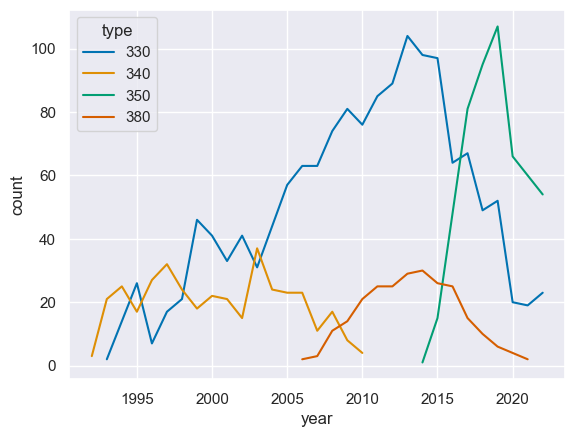

In [15]:
lineplot_all = sns.lineplot(data=all_yc, x="year", y="count", hue="type", 
            palette = "colorblind")

#### Linear subplot a3\*0\_year-count

[Text(0.5, 1.0, 'A380')]

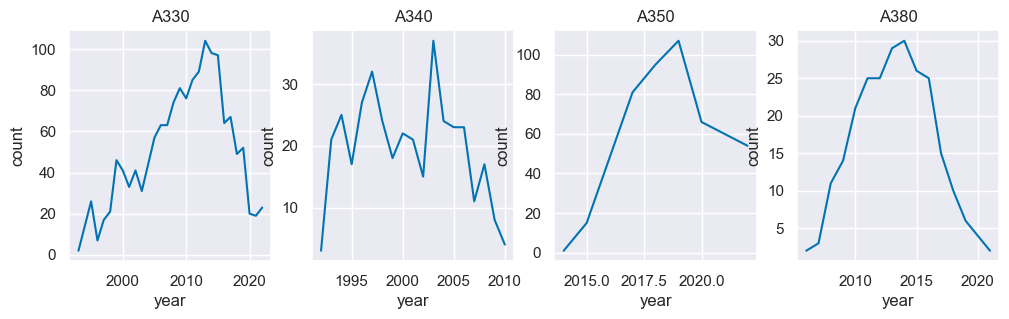

In [39]:
# define plotting region (1 row, 4 columns)
lineplot_sbs, axes = plt.subplots(1, 4, 
                           figsize = (12, 3))

# create linear plot in each column
sns.lineplot(data = a330_yc, x = "year", y = "count", ax = axes[0]).set(title = "A330")
sns.lineplot(data = a340_yc, x = "year", y = "count", ax = axes[1]).set(title = "A340")
sns.lineplot(data = a350_yc, x = "year", y = "count", ax = axes[2]).set(title = "A350")
sns.lineplot(data = a380_yc, x = "year", y = "count", ax = axes[3]).set(title = "A380")

#### Individual lineplots a3\*0\_year-count

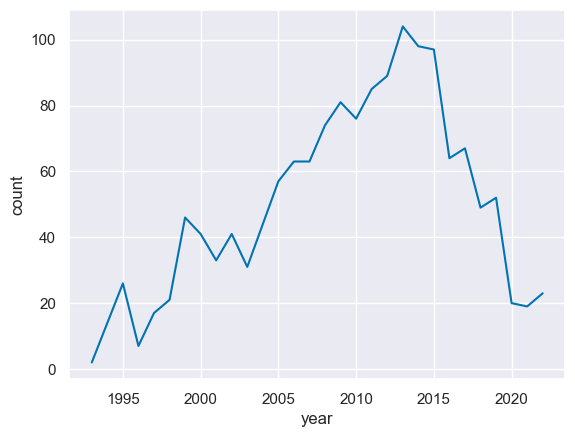

In [70]:
lineplot_a330 = sns.lineplot(data = a330_yc, x = "year", y = "count")

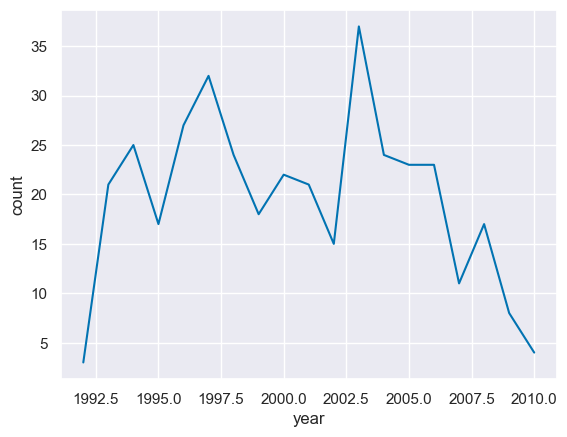

In [75]:
lineplot_a340 = sns.lineplot(data = a340_yc, x = "year", y = "count")

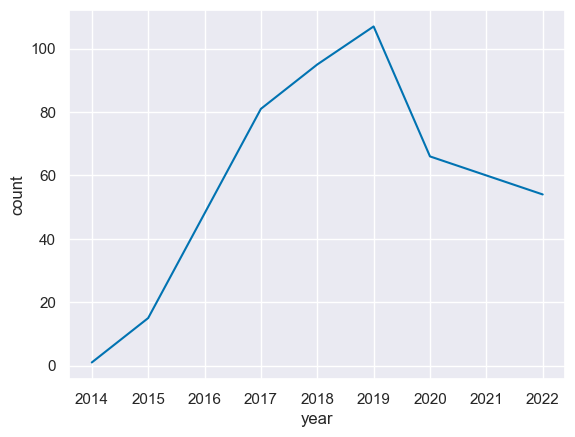

In [72]:
lineplot_a350 = sns.lineplot(data = a350_yc, x = "year", y = "count")

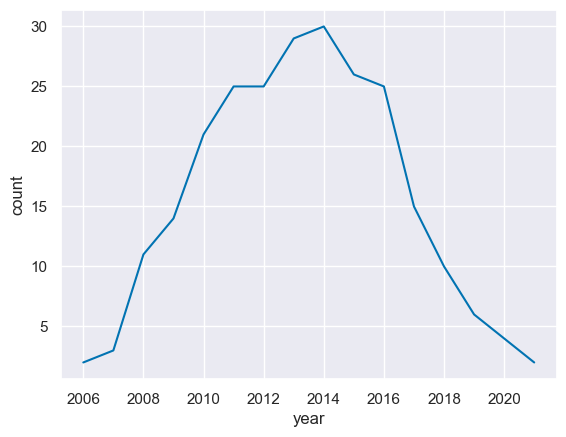

In [73]:
lineplot_a380 = sns.lineplot(data = a380_yc, x = "year", y = "count")

### Histograms

#### Side by side allAircraft_datetime_year kde=True

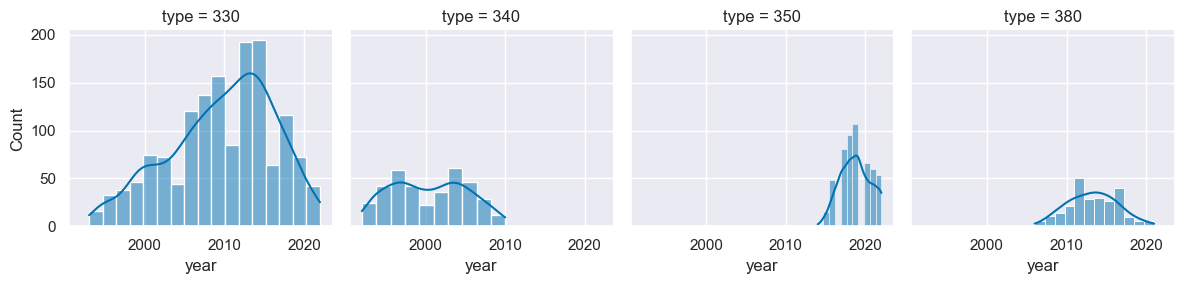

In [33]:
g = sns.FacetGrid(all_y, col = "type")
histogram_all = g.map(sns.histplot, "year", kde = True)

### Boxplot

#### Boxen allAircraft_datetime_year

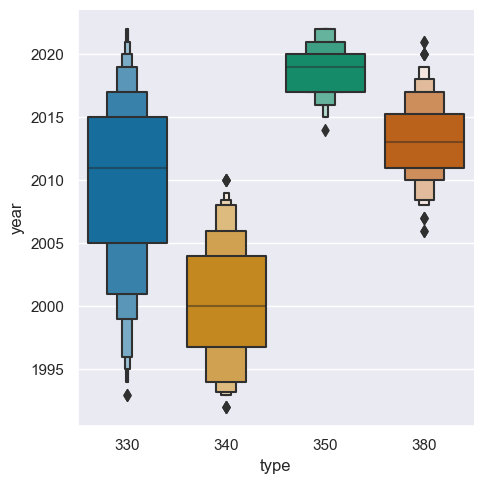

In [36]:
boxen_all = sns.catplot(data = all_y, x = "type", y = "year", 
            kind = "boxen")

#### Violin plot allAircraft_datetime_year

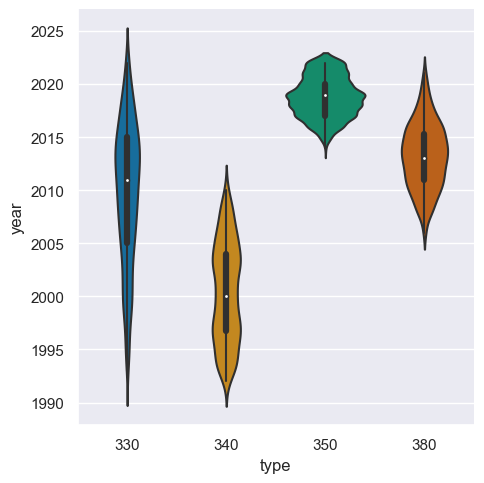

In [37]:
violin_all = sns.catplot(
    data = all_y, x = "type", y = "year",
    kind = "violin", bw = .25)

### Polynomial regression model

#### Regplot a3\*0\_year-count

[Text(0.5, 1.0, 'A380')]

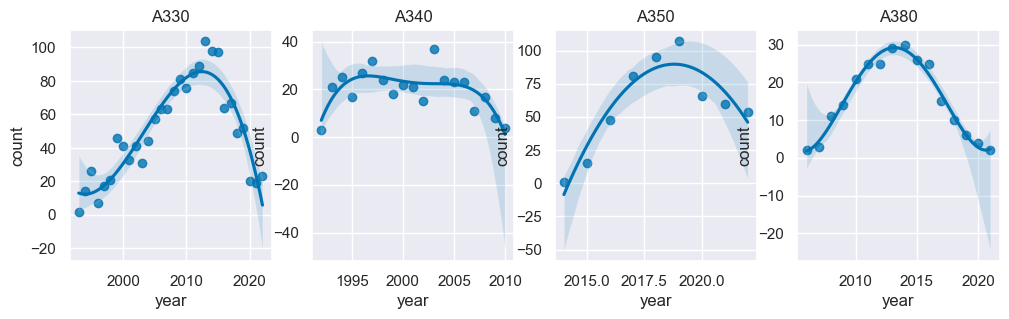

In [38]:
# define plotting region (1 row, 4 columns)
regplot_sbs, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, 
                           figsize = (12, 3))

# create lmplot in each column
sns.regplot(x = "year", y = "count", data = a330_yc, order = 3, 
          ax = ax1).set(title = "A330")
sns.regplot(x = "year", y = "count", data = a340_yc, order = 4, 
           ax = ax2).set(title = "A340")
sns.regplot(x = "year", y = "count", data = a350_yc, order = 2, 
           ax = ax3).set(title = "A350")
sns.regplot(x = "year", y = "count", data = a380_yc, order = 4, 
           ax = ax4).set(title = "A380")

#### lmplot allAircraft_datetime_year

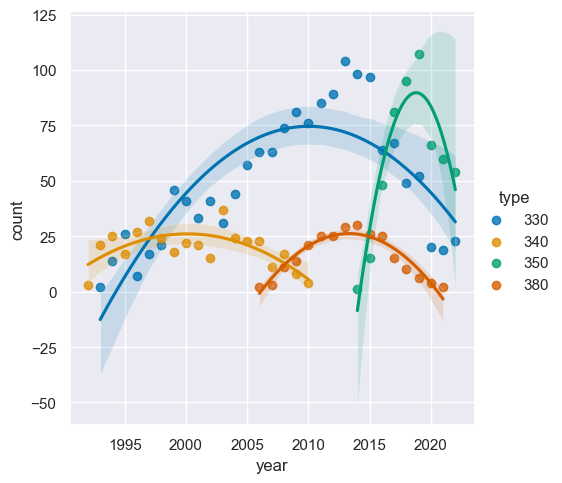

In [40]:
lmplot_all = sns.lmplot(x = "year", y = "count", data = all_yc, 
           order = 2, hue = "type")

## Saving figures

In [107]:
# path to outfile destination
outpath = os.path.join("output/figures")

In [114]:
# making outfiles
lineplot_all.get_figure().savefig("output/fig_lineplot_all.png")
lineplot_sbs.get_figure().savefig("output/fig_lineplot_sbs.png")

lineplot_a330.get_figure().savefig("output/fig_lineplot_a330.png")
lineplot_a340.get_figure().savefig("output/fig_lineplot_a340.png")
lineplot_a350.get_figure().savefig("output/fig_lineplot_a350.png")
lineplot_a380.get_figure().savefig("output/fig_lineplot_a380.png")

histogram_all.savefig("output/fig_histogram_all.png")
boxen_all.savefig("output/fig_boxen_all.png")
violin_all.savefig("output/fig_violin_all.png")

regplot_sbs.get_figure().savefig("output/fig_regplot_sbs.png")
lmplot_all.savefig("output/fig_lmplot_all.png")